# Задача 9.3

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$X_1,...,X_n$ - выборка из стандартного нормального распределения:

In [3]:
n = 100

In [4]:
sample = sps.norm.rvs(size=n)

## Доверительный интервал для $a$ при известном $\sigma^2$

$X_1,...,X_n$ - выборка из распределения $N(a, 1)$. Заметим, что $\overline{X} \sim N(a, \frac{1}{n})$. Тогда $\sqrt{n} \cdot (\overline{X} - a) \sim N(0, 1)$, тогда $ P(U_{\frac{1 - \gamma}{2}} \leq \sqrt{n} \cdot (\overline{X} - a) \leq U_{\frac{1 + \gamma}{2}}) $ и доверительный интервал для a - $\left(\overline{X} - \frac{U_{\frac{1 + \gamma}{2}}}{\sqrt{n}}; \overline{X} + \frac{U_{\frac{1 + \gamma}{2}}}{\sqrt{n}} \right)$, где $U_{\frac{1 + \gamma}{2}} - \left(\frac{1 + \gamma}{2} \right)$-квантиль стандартного нормального распределения.

In [5]:
gamma = 0.95

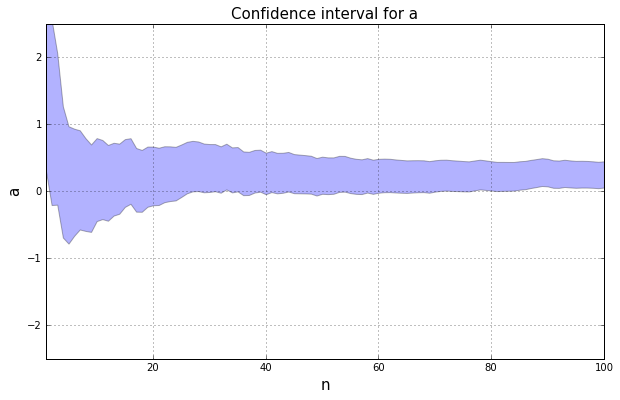

In [6]:
s = np.arange(1, n + 1, 1)
means = sample.cumsum() / s

plt.figure(figsize=(10, 6))
plt.fill_between(s, means - sps.norm.ppf((1 + gamma) / 2) / np.sqrt(s), means + sps.norm.ppf((1 + gamma) / 2) / np.sqrt(s),
                 alpha=0.3)
plt.xlim((1, n))
plt.ylim((-2.5, 2.5))
plt.xlabel('n', fontsize=15)
plt.ylabel('a', fontsize=15)
plt.title('Confidence interval for a', fontsize=15)
plt.grid()
plt.show()

## Доверительный интервал для $\sigma^2$ при известном $a$

$X_1,...,X_n$ - выборка из распределения $N(0, \sigma^2)$. Тогда точный доверительный интервал для $\sigma^2$ - $\left(\frac{\sum_{i=1}^n X_i^2}{U_{\frac{1 + \gamma}{2}}}; \frac{\sum_{i=1}^n X_i^2}{U_{\frac{1 - \gamma}{2}}} \right)$, где $U_{\frac{1 + \gamma}{2}}$ и $U_{\frac{1 - \gamma}{2}}$ - квантили распределения $\chi_n^2$.

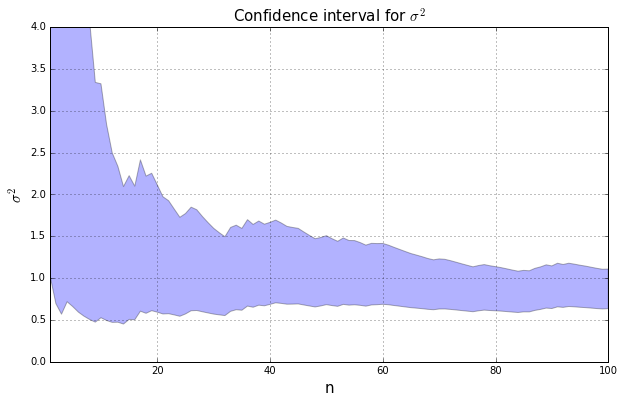

In [7]:
plt.figure(figsize=(10, 6))
plt.fill_between(s, (sample ** 2).cumsum() / sps.chi2.ppf((1 + gamma) / 2, s), (sample ** 2).cumsum() /
                 sps.chi2.ppf((1 - gamma) / 2, s), alpha=0.3)
plt.xlim((1, n))
plt.ylim((0, 4))
plt.xlabel('n', fontsize=15)
plt.ylabel(r'$\sigma^2$', fontsize=15)
plt.title(r'Confidence interval for $\sigma^2$', fontsize=15)
plt.grid()
plt.show()

## Доверительный интервал для $\sigma^2$ при неизвестном $a$

$X_1,...,X_n$ - выборка из распределения $N(a, \sigma^2)$. $\frac{||X-Z \cdot \widehat{\theta}||^2}{\sigma^2} \sim \chi_{n - 1}^2$. Тогда $P(U_{\frac{1 - \gamma}{2}} \leq \frac{||X-Z \cdot \widehat{\theta}||^2}{\sigma^2} \leq U_{\frac{1 + \gamma}{2}}) = \gamma$. Доверительный интервал для $\sigma^2$ - $\left(\frac{||X-Z \cdot \widehat{\theta}||^2}{U_{\frac{1 + \gamma}{2}}}; \frac{||X-Z \cdot \widehat{\theta}||^2}{U_{\frac{1 - \gamma}{2}}}  \right)$, где $U_{\frac{1 - \gamma}{2}} - \frac{1 - \gamma}{2}$-квантиль $\chi_{n-1}^2$, $U_{\frac{1 + \gamma}{2}} - \frac{1 + \gamma}{2}$-квантиль $\chi_{n-1}^2$.

Построим гауссовскую линейную модель: 
$\begin{pmatrix}
X_1 \\
.. \\
X_n
\end{pmatrix} =
\begin{pmatrix} 
1 \\
1 \\
.. \\
1
\end{pmatrix} + 
\begin{pmatrix} 
\varepsilon_0 \\
\varepsilon_1\\
.. \\
\varepsilon_n 
\end{pmatrix}$, значит, $Z=\begin{pmatrix} 
1 \\
1 \\
.. \\
1
\end{pmatrix}$, $\widehat{\theta} = (Z^{T}Z)^{-1} Z^{T} X = \frac{1}{n} \cdot \sum_{i=1}^n X_i = \overline{X}$. Тогда $||X-Z \cdot \widehat{\theta}||^2 = n\cdot S^2$, $S^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2$ - выборочная дисперсия, получаем доверительный интервал -  $\left(\frac{n\cdot S^2}{U_{\frac{1 + \gamma}{2}}}; \frac{n \cdot S^2}{U_{\frac{1 - \gamma}{2}}}  \right)$

In [8]:
sample_var = np.empty(n)
for i in range(n):
    sample_var[i] = sample[:i + 1].var()

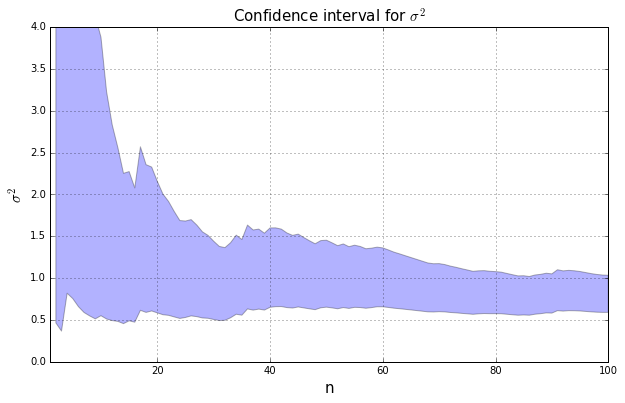

In [9]:
plt.figure(figsize=(10, 6))
#plt.fill_between(s, 0, sample_var * s / sps.chi2.ppf(1 - gamma, s - 1), alpha=0.4)
plt.fill_between(s, sample_var * s / sps.chi2.ppf((1 + gamma) / 2, s - 1), 
                 sample_var * s / sps.chi2.ppf((1 - gamma) / 2, s - 1), alpha=0.3)
plt.xlim((1, n))
plt.ylim((0, 4))
plt.xlabel('n', fontsize=15)
plt.ylabel(r'$\sigma^2$', fontsize=15)
plt.title(r'Confidence interval for $\sigma^2$', fontsize=15)
plt.grid()
plt.show()

## Доверительный интервал для $a$ при неизвестном $\sigma^2$

$X_1,...,X_n$ - выборка из распределения $N(a, \sigma^2)$. $\frac{\sqrt{n}(\widehat{\theta} - a)}{\sqrt{\frac{||X-Z \cdot \widehat{\theta}||^2}{n - 1}}} = \frac{\sqrt{n - 1}(\overline{X} - a)}{\sqrt{S^2}} \sim T_{n - 1}$, $T_{n - 1}$ - распределение Стьюдента. Значит, $P(U_{\frac{1 - \gamma}{2}} \leq \frac{\sqrt{n - 1}(\overline{X} - a)}{\sqrt{S^2}} \leq U_{\frac{1 + \gamma}{2}}) = \gamma$. Доверительный интервал для $a$ - $\left(\overline{X} - U_{\frac{1 + \gamma}{2}} \cdot \frac{\sqrt{S^2}}{\sqrt{n - 1}}; \overline{X} - U_{\frac{1 - \gamma}{2}} \cdot \frac{\sqrt{S^2}}{\sqrt{n - 1}} \right)$, $U$-квантили распределения Стьюдента.

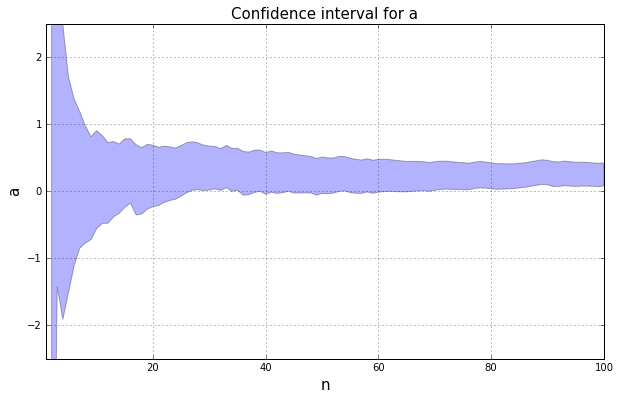

In [10]:
plt.figure(figsize=(10, 6))
plt.fill_between(s, means - np.sqrt(sample_var / s) * sps.t.ppf((1 + gamma) / 2, s - 1), 
                means - np.sqrt(sample_var / s) * sps.t.ppf((1 - gamma) / 2, s - 1), alpha=0.3)
plt.xlim((1, n))
plt.ylim((-2.5, 2.5))
plt.xlabel('n', fontsize=15)
plt.ylabel(r'a', fontsize=15)
plt.title(r'Confidence interval for a', fontsize=15)
plt.grid()
plt.show()

Из графиков видно, что точные доверительные интервалы для a и для $\sigma^2$ уменьшаются при увеличении n, при этом истинные значения параметров($a = 0, \sigma^2 = 1$) всегда в него попадают.